This is a Markdown cell

In [52]:
from __future__ import print_function ## Force python3-like printing

import numpy as np
import astropy as ap
import pandas as pd
import json
import sys

from matplotlib import pyplot as plt
# import seaborn as sns

import rfutils as rfu
import rfcolours as rfc
import PyCoCo as pcc



In [14]:
import httplib
from urlparse import urlparse

def check_url_status(url):
    """
    Snippet from http://stackoverflow.com/questions/6471275 .
    
    Checks the status of a website - a status flag of < 400 means the site
    is up.
    
    """
    p = urlparse(url)
    conn = httplib.HTTPConnection(p.netloc)
    conn.request('HEAD', p.path)
    resp = conn.getresponse()
    
    return resp.status

def check_url(url):
    """
    Wrapper for check_url_status - considers the status, True if < 400. 
    """
    return check_url_status(url) < 400

In [15]:
reload(pcc)
x = pcc.TestClass()
x.print_test_string()

Hello, World!


In [16]:
data_path  = '/Users/berto/Code/verbose-enigma/testdata/SN1998bw.json'

with open(data_path) as data_file:    
    data = json.load(data_file)

sn = data['SN1998bw']


In [17]:
phot = {}

string_keys = [u'u_time', u'band', u'source']
for i, entry in enumerate(sn['photometry']):
    if u'e_magnitude' not in entry:
        entry[u'e_magnitude'] = np.nan
        
    if entry['band'] not in phot:
        phot[entry['band']] = {}

    for key in entry:
        if key not in phot[entry['band']]:
            phot[entry['band']][key] = np.array([])
        if key not in string_keys:
            try: phot[entry['band']][key] = np.append(phot[entry['band']][key], np.float64(entry[key]))
            except: phot[entry['band']][key] = np.append(phot[entry['band']][key], np.nan)
        else:
            phot[entry['band']][key] = np.append(phot[entry['band']][key], entry[key])

In [18]:
phot_flat = {}

# phot.items()

for band in phot:
    for key in phot[band]:
        if key not in phot_flat:
            phot_flat[key] = np.array([])
            
        phot_flat[key] = np.append(phot_flat[key], phot[band][key])

for key in phot_flat.keys():
    print(key, len(phot_flat[key]))

e_magnitude 527
band 527
source 527
magnitude 527
u_time 527
time 527


In [19]:
phot_flat
phot_ap_table = ap.table.Table([phot_flat[i] for i in phot_flat.keys()], names = phot_flat.keys(), meta = sn )

In [20]:
phot_ap_table

e_magnitude,band,source,magnitude,u_time,time
float64,unicode32,unicode32,float64,unicode32,float64
nan,C,"14,18",13.5,MJD,50943.13
nan,C,"14,18",13.5,MJD,50946.14
nan,B,"12,18",15.75,MJD,50930.78
nan,B,"12,18",14.58,MJD,50936.3
nan,B,"12,18",14.35,MJD,50937.48
nan,B,"12,18",14.24,MJD,50939.35
nan,B,"12,18",14.21,MJD,50939.75
nan,B,"12,18",14.13,MJD,50941.32
nan,B,"12,18",14.11,MJD,50941.82


In [21]:
# phot_arr = np.array(phot_arr).T

In [49]:
phot_pd_df = phot_ap_table.to_pandas()
B = phot_pd_df[(phot_pd_df.band) == 'B']

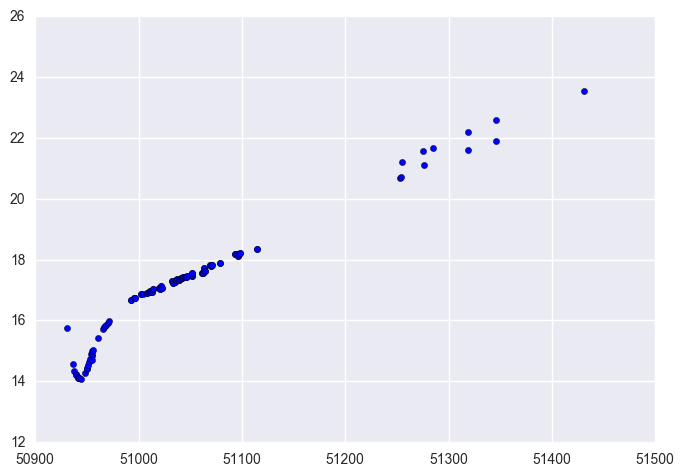

In [54]:
plt.scatter(B.time, B.magnitude)
plt.show()


AttributeError: 'module' object has no attribute 'plot'

In [85]:
phot_arr

array([[u'50929.6', u'50929.6', u'50929.8', ..., u'51466.5', u'51466.5',
        u'51466.5'],
       [u'15.58', u'15.72', u'15.65', ..., u'23.25', u'23.05', u'23.43'],
       [u'nan', u'nan', u'nan', ..., u'nan', u'nan', u'nan'],
       [u'R', u'V', u'R', ..., u'I', u'R', u'V']], 
      dtype='<U8')

In [83]:
phot_ap_table = ap.table.Table([])

astropy.table.table.Table

In [88]:
for p in phot_arr.T:
    print(p)

[u'50929.6' u'15.58' u'nan' u'R']
[u'50929.6' u'15.72' u'nan' u'V']
[u'50929.8' u'15.65' u'nan' u'R']
[u'50929.8' u'15.78' u'nan' u'V']
[u'50930.78' u'15.75' u'nan' u'B']
[u'50930.78' u'15.82' u'nan' u'R']
[u'50931.37' u'15.54' u'nan' u'R']
[u'50931.67' u'15.44' u'nan' u'R']
[u'50931.67' u'15.39' u'nan' u'V']
[u'50934.33' u'14.71' u'nan' u'R']
[u'50936.3' u'14.58' u'nan' u'B']
[u'50936.3' u'14.28' u'nan' u'R']
[u'50936.3' u'14.18' u'nan' u'V']
[u'50937.36' u'14.13' u'nan' u'I']
[u'50937.48' u'14.35' u'nan' u'B']
[u'50937.48' u'14.08' u'nan' u'R']
[u'50937.48' u'14.22' u'nan' u'U']
[u'50937.48' u'14.03' u'nan' u'V']
[u'50939.33' u'13.93' u'nan' u'I']
[u'50939.35' u'14.24' u'nan' u'B']
[u'50939.35' u'13.88' u'nan' u'R']
[u'50939.35' u'13.92' u'nan' u'U']
[u'50939.35' u'13.82' u'nan' u'V']
[u'50939.73' u'13.92' u'nan' u'I']
[u'50939.75' u'14.21' u'nan' u'B']
[u'50939.75' u'13.85' u'nan' u'R']
[u'50939.75' u'13.85' u'nan' u'V']
[u'50941.3' u'13.82' u'nan' u'I']
[u'50941.32' u'14.13' u'nan'

In [228]:
import urllib2
url = 'https://sne.space/sne/SN2011F.json'

check_url(url)
check_url_status(url)

301

In [229]:
if check_url(url):
    try:
        response = urllib.urlopen(url)
    except urllib2.HTTPError, e:
        print(e.code)
    except urllib2.URLError, e:
        print(e.args)
    
    try:
        data = json.loads(response.read())
    except ValueError as e:
        print(e)

In [230]:
print(data)

{u'SN2011F': {u'discoverer': [{u'source': u'2,6,9', u'value': u'LOSS'}], u'redshift': [{u'source': u'2,6', u'value': u'0.0223'}], u'claimedtype': [{u'source': u'2,4,5,6,8,9', u'value': u'II'}], u'maxvisualdate': [{u'source': u'2,6,7', u'derived': True, u'value': u'2011/01/06'}], u'sources': [{u'alias': u'1', u'bibcode': u'2015arXiv150201589P', u'name': u'2015arXiv150201589P', u'reference': u'Planck Collaboration et al. (2015)'}, {u'url': u'http://www.cbat.eps.harvard.edu/iau/cbet/002600/CBET002630.txt', u'alias': u'2', u'bibcode': u'2011CBET.2630....2N', u'name': u'CBET 2630', u'reference': u'Narayan & Kirshner (2011)'}, {u'alias': u'3', u'bibcode': u'2011ApJ...737..103S', u'name': u'2011ApJ...737..103S', u'reference': u'Schlafly & Finkbeiner (2011)'}, {u'alias': u'4', u'bibcode': u'2008yCat....1.2024B', u'name': u'2008yCat....1.2024B', u'reference': u'Barbon et al. (2008)'}, {u'url': u'https://wis-tns.weizmann.ac.il/', u'alias': u'5', u'name': u'Transient Name Server'}, {u'url': u'htt